<a href="https://colab.research.google.com/github/g0ku103/Churn-Prediction-Project/blob/main/Car_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
['Dealer' 'Individual']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     301 non-null    float64
 1   Present_Price     301 non-null    float64
 2   Kms_Driven        301 non-null    int64  
 3   Seller_Type       301 non-null    int64  
 4   Transmission      301 non-null    int64  
 5   Owner             301 non-null    int64  
 6   Car_Age           301 non-null    int64  
 7   Fuel_Type_CNG     301 non-null    bool   
 8   Fuel_Type_Diesel  301 non-null    bool   
 9   Fuel_Type_Petrol  301 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 17.5 KB
None
   Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  \
0           3.35           5.59       27000            0             1      0   
1   

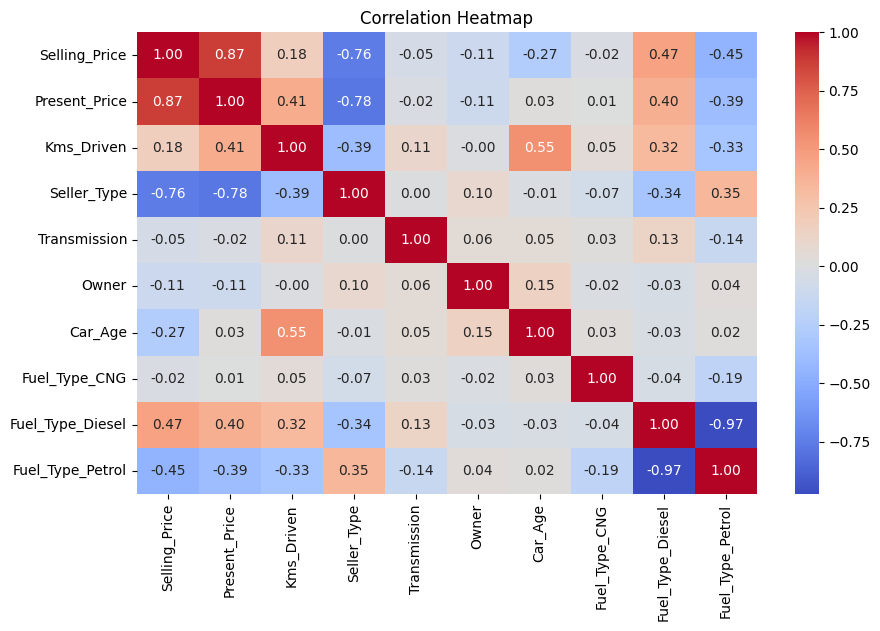

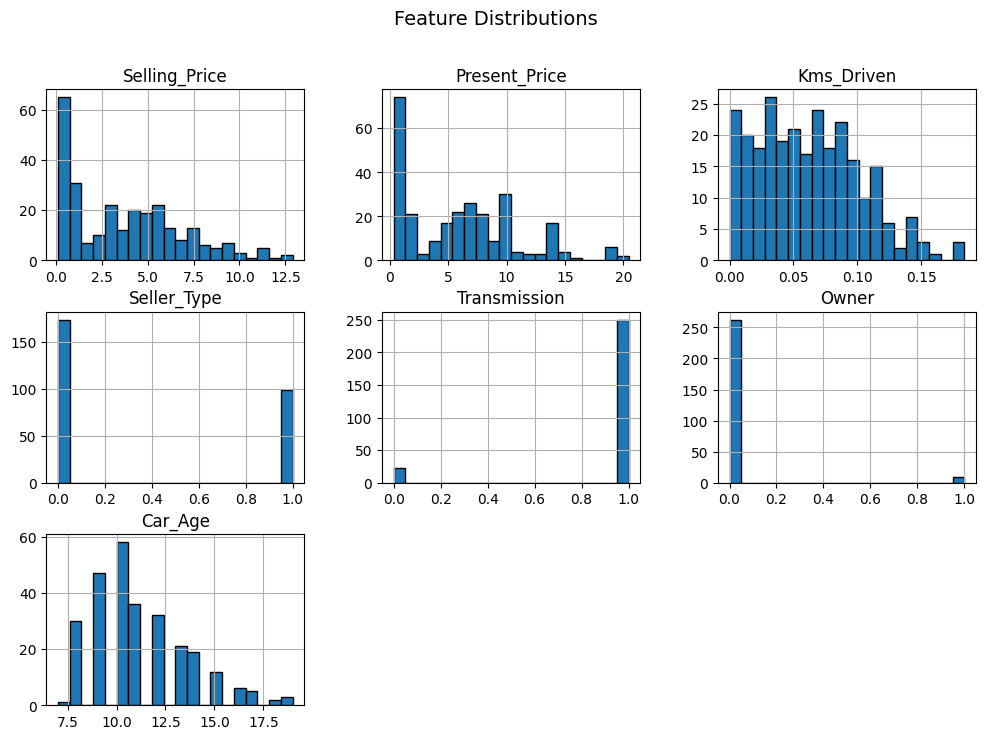

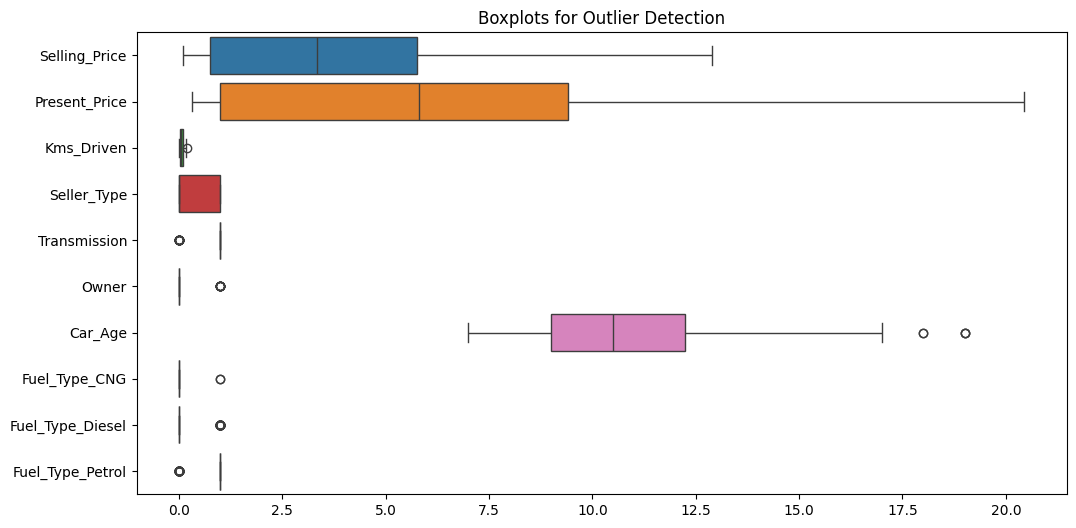

Linear Regression Model Performance:
MAE: 0.72
MSE: 1.20
R² Score: 0.89
Random Forest Model Performance:
MAE: 0.47
MSE: 0.55
R² Score: 0.95


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/car data (2).csv")
df
a=df["Seller_Type"].nunique()
b=df["Seller_Type"].value_counts()
c=df["Seller_Type"].unique()
print(a)
print(b)
print(c)
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load the dataset

# Step 1: Drop 'Car_Name' column
df.drop(columns=['Car_Name'], inplace=True)

# Step 2: Convert 'Year' into 'Car_Age'
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']
df.drop(columns=['Year'], inplace=True)  # Drop original 'Year' column

# Step 3: Encode categorical variables
le = LabelEncoder()
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])  # Label Encoding for Seller_Type
df['Transmission'] = le.fit_transform(df['Transmission'])  # Label Encoding for Transmission
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False)  # One-Hot Encoding for Fuel_Type

# Display the updated dataset structure
print(df.info())
print(df.head())
from sklearn.preprocessing import MinMaxScaler
# Step 4: Scale 'Kms_Driven'
scaler = MinMaxScaler()
df['Kms_Driven'] = scaler.fit_transform(df[['Kms_Driven']])
# Outlier Handling using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for numerical features
df = remove_outliers(df, 'Selling_Price')
df = remove_outliers(df, 'Present_Price')
df = remove_outliers(df, 'Kms_Driven')
df = remove_outliers(df, 'Car_Age')
import matplotlib.pyplot as plt
import seaborn as sns
# Exploratory Data Analysis (EDA)
# Statistical Summary
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots for Outlier Detection")
plt.show()
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Split Data into Training and Testing Sets
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train a Baseline Model (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  Model Evaluation
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print model performance
print("Linear Regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2:.2f}")
from sklearn.ensemble import RandomForestRegressor
#  Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print model performance
print("Random Forest Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2:.2f}")


Saving The model

In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Streamlit

In [ ]:
! pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.8 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model and scaler
model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit UI
st.title("Car Price Prediction 🚗💰")
st.write("Enter car details to predict the selling price.")

# User input fields

present_price = st.number_input("Present Price (in Lakhs)", min_value=0.0, format="%.2f")
kms_driven = st.number_input("Kilometers Driven", min_value=0)
owner = st.selectbox("Number of Previous Owners", [0, 1, 2, 3])
car_age = st.number_input("Car Age (in years)", min_value=0)
seller_type = st.selectbox("Seller Type", ["Dealer", "Individual"])
transmission = st.selectbox("Transmission Type", ["Manual", "Automatic"])
fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG"])

# Encode categorical values
seller_type = 1 if seller_type == "Individual" else 0
transmission = 1 if transmission == "Automatic" else 0
fuel_type_cng = 1 if fuel_type == "CNG" else 0
fuel_type_diesel = 1 if fuel_type == "Diesel" else 0
fuel_type_petrol = 1 if fuel_type == "Petrol" else 0

# Scale 'Kms_Driven'
kms_driven_scaled = scaler.transform(np.array([[kms_driven]]))[0][0]

# Prepare input for prediction
features = np.array([[present_price, kms_driven_scaled, owner, seller_type, transmission, car_age, fuel_type_cng, fuel_type_diesel, fuel_type_petrol]])

# Predict button
if st.button("Predict Price"):
    prediction = model.predict(features)[0]
    st.success(f"Estimated Selling Price: ₹{prediction:.2f} Lakhs")


2025-10-10 04:47:11.379 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-10 04:47:12.128 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-10 04:47:12.131 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-10 04:47:12.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-10 04:47:12.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-10 04:47:12.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-10 04:47:12.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-10 04:47:12.151 Thread 'MainThread': mi

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.245.145.202


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.145.202:8501

⠴⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://olive-eels-yawn.loca.lt
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does n